In [11]:
#TESLA DATA yfinance
import yfinance as yf



tesla = yf.Ticker("TSLA")


tesla_history = tesla.history(period="5y")
print(tesla_history.head())


                                 Open        High        Low       Close  \
Date                                                                       
2020-07-13 00:00:00-04:00  110.599998  119.666000  98.073997   99.804001   
2020-07-14 00:00:00-04:00  103.733330  106.000000  95.400002  101.120003   
2020-07-15 00:00:00-04:00  102.866669  103.333336  97.133331  103.067329   
2020-07-16 00:00:00-04:00   98.477333  102.113998  97.733330  100.042664   
2020-07-17 00:00:00-04:00  100.896667  102.500664  99.333336  100.056000   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-07-13 00:00:00-04:00  584781000        0.0           0.0  
2020-07-14 00:00:00-04:00  351271500        0.0           0.0  
2020-07-15 00:00:00-04:00  245517000        0.0           0.0  
2020-07-16 00:00:00-04:00  214512000        0.0           0.0  
2020-07-17 00:00:00-04:00  139950000        0.0           0.0  


In [12]:
#TESLA DATA  web scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
for table in tables:
    if "Tesla Annual Revenue" in table.text:
        rows = table.find_all("tr")
        data = []
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                data.append((date, revenue))
        tesla_revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])
        break

print(tesla_revenue_df.head())


   Date Revenue
0  2024   97690
1  2023   96773
2  2022   81462
3  2021   53823
4  2020   31536


In [13]:
#GAMESTOP DATA yfinance
gamestop = yf.Ticker("GME")

# Son 5 yılın günlük fiyat verisi
gme_history = gamestop.history(period="5y")
print(gme_history.head())


                             Open    High     Low   Close    Volume  \
Date                                                                  
2020-07-13 00:00:00-04:00  1.0875  1.1375  1.0650  1.0650  16864800   
2020-07-14 00:00:00-04:00  1.0550  1.0775  1.0175  1.0200   9046400   
2020-07-15 00:00:00-04:00  1.0325  1.0725  1.0325  1.0475   5896400   
2020-07-16 00:00:00-04:00  1.0475  1.0500  1.0225  1.0425   5320400   
2020-07-17 00:00:00-04:00  1.0400  1.0575  0.9850  0.9900  12263600   

                           Dividends  Stock Splits  
Date                                                
2020-07-13 00:00:00-04:00        0.0           0.0  
2020-07-14 00:00:00-04:00        0.0           0.0  
2020-07-15 00:00:00-04:00        0.0           0.0  
2020-07-16 00:00:00-04:00        0.0           0.0  
2020-07-17 00:00:00-04:00        0.0           0.0  


In [14]:
# GAMESTOP DATA web scraping
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
for table in tables:
    if "GameStop Annual Revenue" in table.text:
        rows = table.find_all("tr")
        data = []
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                data.append((date, revenue))
        gamestop_revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])
        break

print(gamestop_revenue_df.head())


   Date Revenue
0  2025    3823
1  2024    5273
2  2023    5927
3  2022    6011
4  2021    5090


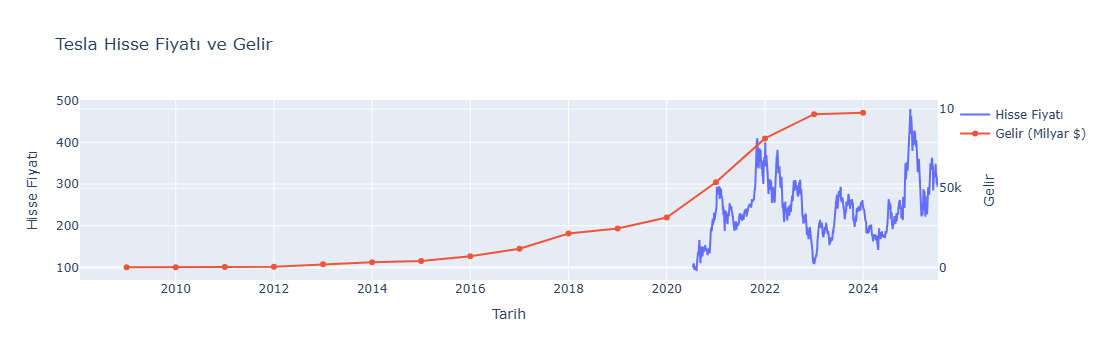

In [19]:
#TESLA CHART
import plotly.graph_objects as go

fig = go.Figure()

# Hisse senedi grafiği
fig.add_trace(go.Scatter(x=tesla_history.index, y=tesla_history['Close'], name="Hisse Fiyatı"))

# Gelir çizgisi
tesla_revenue_df['Date'] = pd.to_datetime(tesla_revenue_df['Date'])
tesla_revenue_df['Revenue'] = pd.to_numeric(tesla_revenue_df['Revenue'])

fig.add_trace(go.Scatter(x=tesla_revenue_df['Date'], y=tesla_revenue_df['Revenue'], name="Gelir (Milyar $)", yaxis="y2"))

# İkincil y ekseni
fig.update_layout(
    title="Tesla Hisse Fiyatı ve Gelir",
    yaxis=dict(title="Hisse Fiyatı"),
    yaxis2=dict(title="Gelir", overlaying='y', side='right'),
    xaxis=dict(title="Tarih")
)

fig.show()


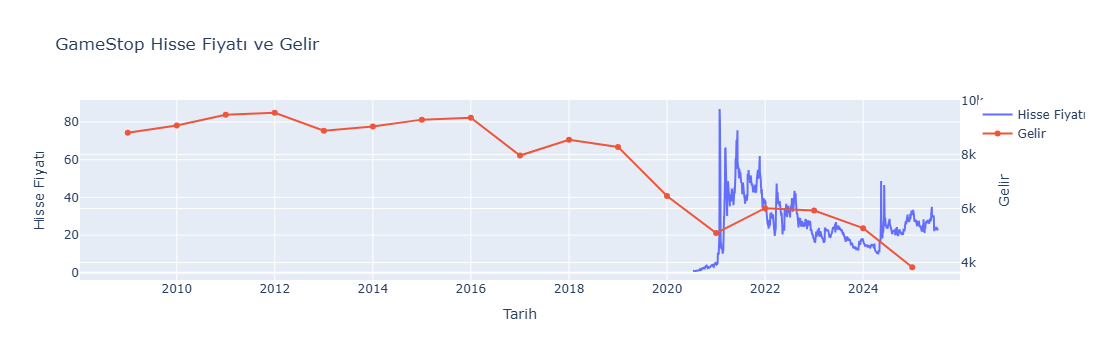

In [20]:
#GAMESTOP CHART
fig = go.Figure()

# Hisse senedi grafiği
fig.add_trace(go.Scatter(x=gme_history.index, y=gme_history['Close'], name="Hisse Fiyatı"))

# Gelir çizgisi
gamestop_revenue_df['Date'] = pd.to_datetime(gamestop_revenue_df['Date'])
gamestop_revenue_df['Revenue'] = pd.to_numeric(gamestop_revenue_df['Revenue'])

fig.add_trace(go.Scatter(x=gamestop_revenue_df['Date'], y=gamestop_revenue_df['Revenue'], name="Gelir", yaxis="y2"))

# İkincil y ekseni
fig.update_layout(
    title="GameStop Hisse Fiyatı ve Gelir",
    yaxis=dict(title="Hisse Fiyatı"),
    yaxis2=dict(title="Gelir", overlaying='y', side='right'),
    xaxis=dict(title="Tarih")
)

fig.show()
